In [1]:
from keras.datasets import mnist
from keras import models
from keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
def show_train_history(train_history, train, validation, size):  
    plt.plot(train_history.history[train], linewidth=3)  
    plt.plot(train_history.history[validation], linewidth=3)  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'])
    plt.legend(['Train', 'Validation'], loc='best')
    plt.grid(True)
    if train == 'acc':
        plt.savefig("batch_size_acc_" + str(size) + ".jpg")
    if train == 'loss':
        plt.savefig("batch_size_loss_" + str(size) + ".jpg")
    plt.show()  

In [4]:
#batch_size=64
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
train_history_64 = network.fit(train_images, train_labels, validation_split=0.2, epochs=20, batch_size=64)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 101us/step - loss: 0.9069 - acc: 0.7986 - val_loss: 0.4689 - val_acc: 0.8867
Epoch 2/20
48000/48000 [==============================] - 3s 64us/step - loss: 0.4367 - acc: 0.8881 - val_loss: 0.3633 - val_acc: 0.9048
Epoch 3/20
48000/48000 [==============================] - 3s 64us/step - loss: 0.3646 - acc: 0.9013 - val_loss: 0.3217 - val_acc: 0.9127
Epoch 4/20
48000/48000 [==============================] - 3s 62us/step - loss: 0.3288 - acc: 0.9100 - val_loss: 0.2967 - val_acc: 0.9166
Epoch 5/20
48000/48000 [==============================] - 3s 65us/step - loss: 0.3047 - acc: 0.9153 - val_loss: 0.2789 - val_acc: 0.9231
Epoch 6/20
48000/48000 [==============================] - 3s 63us/step - loss: 0.2866 - acc: 0.9206 - val_loss: 0.2645 - val_acc: 0.9273
Epoch 7

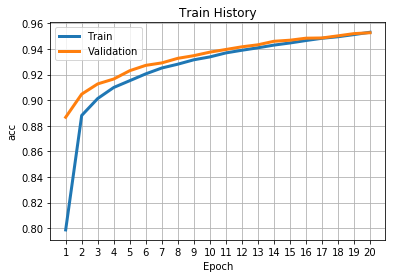

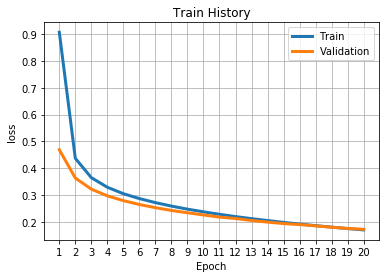

60000/60000 [==============================] - 3s 50us/step

[Info] Accuracy of testing data = 95.3%


In [5]:
size = 64
show_train_history(train_history_64, 'acc', 'val_acc', size)
show_train_history(train_history_64, 'loss', 'val_loss', size)

scores_64 = network.evaluate(train_images, train_labels)
print()
print("[Info] Accuracy of testing data = {:2.1f}%".format(scores_64[1]*100.0)) 

In [6]:
#batch_size=128
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
train_history_128 = network.fit(train_images, train_labels, validation_split=0.2, epochs=20, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 45us/step - loss: 1.2046 - acc: 0.7309 - val_loss: 0.6742 - val_acc: 0.8560
Epoch 2/20
48000/48000 [==============================] - 2s 39us/step - loss: 0.5887 - acc: 0.8606 - val_loss: 0.4705 - val_acc: 0.8849
Epoch 3/20
48000/48000 [==============================] - 2s 38us/step - loss: 0.4642 - acc: 0.8811 - val_loss: 0.3991 - val_acc: 0.8984
Epoch 4/20
48000/48000 [==============================] - 2s 38us/step - loss: 0.4081 - acc: 0.8918 - val_loss: 0.3617 - val_acc: 0.9038
Epoch 5/20
48000/48000 [==============================] - 2s 38us/step - loss: 0.3746 - acc: 0.8989 - val_loss: 0.3370 - val_acc: 0.9101
Epoch 6/20
48000/48000 [==============================] - 2s 39us/step - loss: 0.3511 - acc: 0.9035 - val_loss: 0.3190 - val_acc: 0.9119
Epoch 7/20
48000/48000 [==============================] - 2s 38us/step - loss: 0.3334 - acc: 0.9079 - val_loss: 0.3055 - val_acc

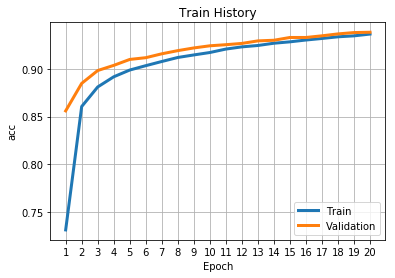

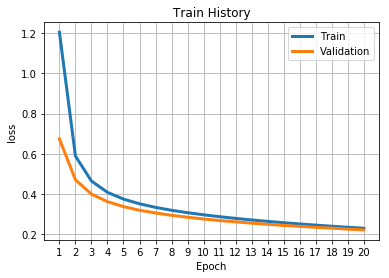

60000/60000 [==============================] - 2s 41us/step

[Info] Accuracy of testing data = 93.8%


In [7]:
size = 128
show_train_history(train_history_128, 'acc', 'val_acc', size)
show_train_history(train_history_128, 'loss', 'val_loss', size)

scores_128 = network.evaluate(train_images, train_labels)
print()
print("[Info] Accuracy of testing data = {:2.1f}%".format(scores_128[1]*100.0)) 

In [8]:
#batch_size=256
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
train_history_256 = network.fit(train_images, train_labels, validation_split=0.2, epochs=20, batch_size=256)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 27us/step - loss: 1.6042 - acc: 0.6296 - val_loss: 1.0446 - val_acc: 0.8163
Epoch 2/20
48000/48000 [==============================] - 1s 22us/step - loss: 0.8617 - acc: 0.8244 - val_loss: 0.6791 - val_acc: 0.8591
Epoch 3/20
48000/48000 [==============================] - 1s 22us/step - loss: 0.6387 - acc: 0.8541 - val_loss: 0.5425 - val_acc: 0.8752
Epoch 4/20
48000/48000 [==============================] - 1s 22us/step - loss: 0.5393 - acc: 0.8688 - val_loss: 0.4728 - val_acc: 0.8866
Epoch 5/20
48000/48000 [==============================] - 1s 22us/step - loss: 0.4823 - acc: 0.8786 - val_loss: 0.4301 - val_acc: 0.8920
Epoch 6/20
48000/48000 [==============================] - 1s 24us/step - loss: 0.4448 - acc: 0.8851 - val_loss: 0.4003 - val_acc: 0.8983
Epoch 7/20
48000/48000 [==============================] - 1s 22us/step - loss: 0.4178 - acc: 0.8901 - val_loss: 0.3794 - val_acc

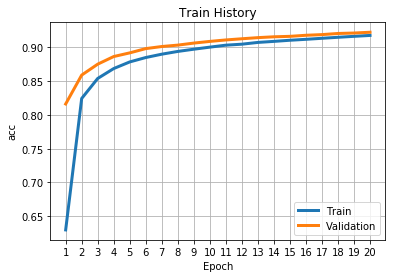

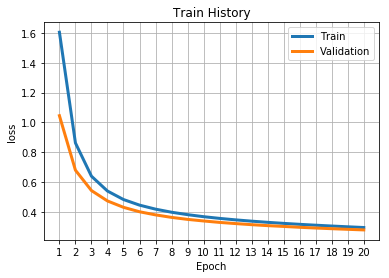

60000/60000 [==============================] - 3s 45us/step

[Info] Accuracy of testing data = 92.0%


In [9]:
size = 256
show_train_history(train_history_256, 'acc', 'val_acc', size)
show_train_history(train_history_256, 'loss', 'val_loss', size)

scores_256 = network.evaluate(train_images, train_labels)
print()
print("[Info] Accuracy of testing data = {:2.1f}%".format(scores_256[1]*100.0)) 

In [10]:
#batch_size=512
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
train_history_512 = network.fit(train_images, train_labels, validation_split=0.2, epochs=20, batch_size=512)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 23us/step - loss: 1.8946 - acc: 0.5212 - val_loss: 1.5104 - val_acc: 0.7456
Epoch 2/20
48000/48000 [==============================] - 1s 17us/step - loss: 1.2810 - acc: 0.7745 - val_loss: 1.0482 - val_acc: 0.8213
Epoch 3/20
48000/48000 [==============================] - 1s 17us/step - loss: 0.9487 - acc: 0.8199 - val_loss: 0.8087 - val_acc: 0.8504
Epoch 4/20
48000/48000 [==============================] - 1s 17us/step - loss: 0.7721 - acc: 0.8421 - val_loss: 0.6760 - val_acc: 0.8617
Epoch 5/20
48000/48000 [==============================] - 1s 17us/step - loss: 0.6680 - acc: 0.8550 - val_loss: 0.5936 - val_acc: 0.8735
Epoch 6/20
48000/48000 [==============================] - 1s 17us/step - loss: 0.6003 - acc: 0.8638 - val_loss: 0.5385 - val_acc: 0.8797
Epoch 7/20
48000/48000 [==============================] - 1s 17us/step - loss: 0.5526 - acc: 0.8701 - val_loss: 0.4991 - val_acc

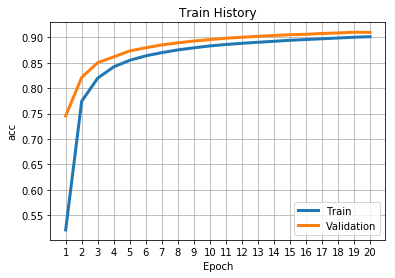

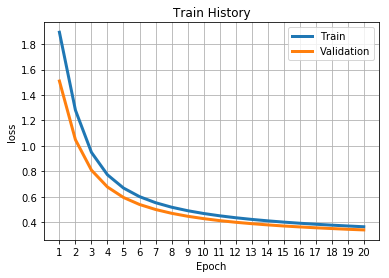

60000/60000 [==============================] - 3s 47us/step

[Info] Accuracy of testing data = 90.4%


In [11]:
size = 512
show_train_history(train_history_512, 'acc', 'val_acc', size)
show_train_history(train_history_512, 'loss', 'val_loss', size)

scores_512 = network.evaluate(train_images, train_labels)
print()
print("[Info] Accuracy of testing data = {:2.1f}%".format(scores_512[1]*100.0)) 

In [12]:
#batch_size=1024
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
train_history_1024 = network.fit(train_images, train_labels, validation_split=0.2, epochs=20, batch_size=1024)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 20us/step - loss: 2.0580 - acc: 0.3625 - val_loss: 1.8132 - val_acc: 0.6155
Epoch 2/20
48000/48000 [==============================] - 1s 13us/step - loss: 1.6529 - acc: 0.6825 - val_loss: 1.4608 - val_acc: 0.7597
Epoch 3/20
48000/48000 [==============================] - 1s 13us/step - loss: 1.3537 - acc: 0.7663 - val_loss: 1.2007 - val_acc: 0.8052
Epoch 4/20
48000/48000 [==============================] - 1s 13us/step - loss: 1.1373 - acc: 0.7970 - val_loss: 1.0154 - val_acc: 0.8262
Epoch 5/20
48000/48000 [==============================] - 1s 13us/step - loss: 0.9833 - acc: 0.8160 - val_loss: 0.8837 - val_acc: 0.8388
Epoch 6/20
48000/48000 [==============================] - 1s 13us/step - loss: 0.8725 - acc: 0.8290 - val_loss: 0.7877 - val_acc: 0.8492
Epoch 7/20
48000/48000 [==============================] - 1s 13us/step - loss: 0.7906 - acc: 0.8382 - val_loss: 0.7163 - val_acc

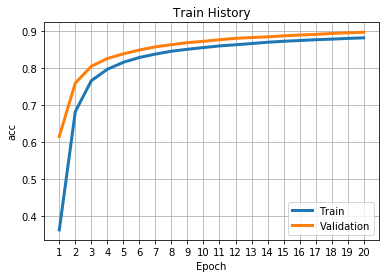

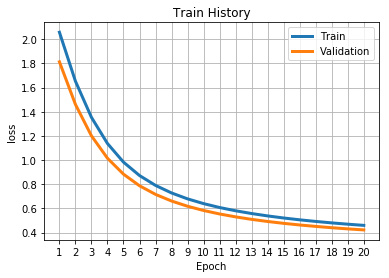

60000/60000 [==============================] - 3s 45us/step

[Info] Accuracy of testing data = 88.6%


In [13]:
size = 1024
show_train_history(train_history_1024, 'acc', 'val_acc', size)
show_train_history(train_history_1024, 'loss', 'val_loss', size)


scores_1024 = network.evaluate(train_images, train_labels)
print()
print("[Info] Accuracy of testing data = {:2.1f}%".format(scores_1024[1]*100.0)) 

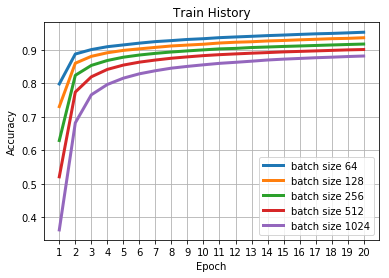

In [14]:
plt.plot(train_history_64.history['acc'], linewidth=3)
plt.plot(train_history_128.history['acc'], linewidth=3)
plt.plot(train_history_256.history['acc'], linewidth=3)
plt.plot(train_history_512.history['acc'], linewidth=3)
plt.plot(train_history_1024.history['acc'], linewidth=3)
plt.title('Train History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'])
plt.legend(['batch size 64','batch size 128','batch size 256','batch size 512','batch size 1024'], loc='best')
plt.grid(True)
plt.savefig('batch_size_acc_all.jpg',dpi=300)

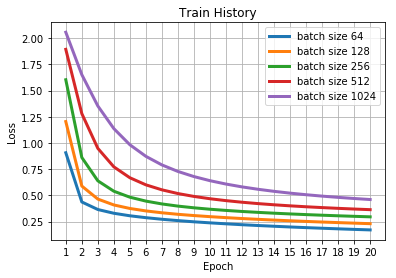

In [15]:
plt.plot(train_history_64.history['loss'], linewidth=3)
plt.plot(train_history_128.history['loss'], linewidth=3)
plt.plot(train_history_256.history['loss'], linewidth=3)
plt.plot(train_history_512.history['loss'], linewidth=3)
plt.plot(train_history_1024.history['loss'], linewidth=3)
plt.title('Train History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'])
plt.legend(['batch size 64','batch size 128','batch size 256','batch size 512','batch size 1024'], loc='best')
plt.grid(True)
plt.savefig('batch_size_loss_all.jpg',dpi=300)

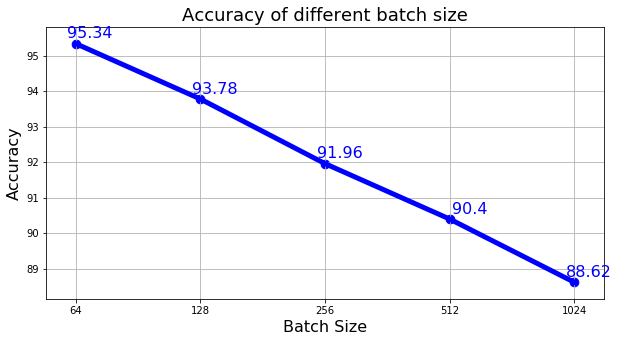

In [53]:
acc = [round(scores_64[1]*100,2),round(scores_128[1]*100,2),round(scores_256[1]*100,2),round(scores_512[1]*100,2),round(scores_1024[1]*100,2)]
x = ['64','128','256','512','1024']
plt.figure(figsize=(10,5))
plt.plot(x,acc,'b',lw=5)
plt.scatter(x, acc, s = 75,color='b')
plt.title('Accuracy of different batch size', fontsize='18')
plt.xlabel('Batch Size',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.grid(True)
for x,y in enumerate(acc):
    plt.text(x+0.3,y+0.15,'%s' %y, ha='right', color='b',fontsize=16)
plt.savefig('Accuracy of different batch size.jpg',dpi=300)